#**TensorFlow**

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf #version1 of tf

In [3]:
print(tf.__version__)


1.15.2


In [4]:
a = tf.constant(6) #creating constants
b = tf.constant(3)

In [5]:
a

<tf.Tensor 'Const:0' shape=() dtype=int32>

In [6]:
sess = tf.Session()

In [7]:
sess.run(a)

6

In [8]:
# constants can be 2D matrices, strings etc.
a1 = tf.constant([[3,3]])
a2 = tf.constant([[3,2],[3,3]])
res = tf.matmul(a1, a2)
sess.run(res)


array([[18, 15]], dtype=int32)

In [9]:
a=tf.constant(8)
a=tf.constant(28) # is perfectly valid as a new tensor object is created here 

sess.run(a)

28

You can also use the following lines of code to start up an interactive Session, run the result and close the Session automatically again after printing the output. Using eval() function inside the session will print the result for you. 


In [10]:
#session
a = tf.constant(2)
b = tf.constant(3)
c = a + b
with tf.Session() as sess: 
  print(c.eval())

5


##**Variables**

TensorFlow has Variable nodes too which can hold variable data. They are mainly used to hold and update parameters of a training model.

Variables are in-memory buffers containing tensors. They must be explicitly initialized and can be saved to disk during and after training. You can later restore saved values to exercise or analyze the model.

An important difference to note between a constant and Variable is:

A constant’s value is stored in the graph and its value is replicated wherever the graph is loaded. A variable is stored separately, and may live on a parameter server.

In [11]:
var1= tf.Variable(100)
sess = tf.Session()
sess.run(var1) # Generates an error because a variable is supposed to be explicitly intialized 

FailedPreconditionError: ignored

In [12]:
sess.run(tf.global_variables_initializer()) # initializing global variable var1 now
temp=var1.assign(122)  #assign will assign values to variable
sess.run(var1)  #var1 containes old value because assign is not run yet in session 

100

In [13]:
sess.run(temp) # now var1 has new value

122

In [14]:
var1 = tf.Variable(100)
var2 = tf.Variable(200)
var3 = tf.Variable(300) 
sess.run(tf.global_variables_initializer())
sess.run(var3)

300

##**Placeholders**

Placeholders are more basic than a variable. It is simply a variable that we asign data in a future time.

 Placeholders are nodes whose value is fed in at execution time. Placeholders don't need any initial value; only a datatype (such as float32) and a tensor shape

While evaluating the graph involving placeholder nodes, a feed_dict parameter is passed to the session’s run method to specify Tensors that provide concrete values to these placeholders.

In [15]:
x =tf.placeholder(tf.int32) #type is supposed to be specified 
y =tf.placeholder(tf.int32)

In [16]:
v = 3 * x
sess = tf.Session()
#sess.run(v)  # error is generated as v is supposed to use values present in x, which are not provided yet 

In [17]:
# to pass values we need to provide a dictionary 
sess.run(v,feed_dict={x:20}) # see it only requires the values which would be required to compute v hence y value was not asked 

60

In [18]:
# we can create multidimensional placeholders also 
x =tf.placeholder(tf.int32,shape=(2,2))
y = x * tf.constant(12)
sess.run(y, feed_dict={x:[[1,2], [4,5]]})

array([[12, 24],
       [48, 60]], dtype=int32)

##**Neural Networks using TensorFlow**

**Dataset Used - MNIST dataset**

###**Loading the Dataset**

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True) #mnist dataset where the o/p is onehot encoded.

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [20]:
mnist 

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f3ad2933be0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f3ad2933b70>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f3b2fac5940>)

In [21]:
mnist.train.images.shape , mnist.train.labels.shape

((55000, 784), (55000, 10))

In [25]:
image1=mnist.train.images[4119]
image1=np.array(image1,float) #converting the image back into 2d
image1=image1.reshape((28,28))

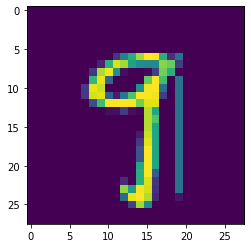

In [26]:
plt.imshow(image1)
plt.show()

###**Initialising Weights and Biases**

In [31]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

###**Forward Propogation**

In [32]:
def fwd_prop(x,weights,biases):
    layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    layer1=tf.nn.relu(layer1)  #activation 
    
    layer2=tf.add(tf.matmul(layer1,weights['h2']),biases['h2'])
    layer2=tf.nn.relu(layer2)
    
    output=tf.add(tf.matmul(layer2,weights['out']),biases['out'])
    return output

###**Finding Predictions and Accuracy**

In [33]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder(tf.int32, [None, n_classes])

In [35]:
pred = fwd_prop(x, weights, biases)
predictions = tf.argmax(pred, 1)
true_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, true_labels)

In [38]:
predictions_eval,labels, correct_pred  = sess.run([predictions, true_labels, correct_predictions], feed_dict={x:mnist.train.images, y:mnist.train.labels})
predictions_eval,labels,correct_pred

(array([1, 0, 4, ..., 0, 0, 4]),
 array([7, 3, 4, ..., 5, 6, 8]),
 array([False, False,  True, ..., False, False, False]))

In [39]:
correct_pred.sum()  # Answer of Train data using random values

7377

In [40]:
predictions_eval,labels, correct_pred  = sess.run([predictions, true_labels, correct_predictions], feed_dict={x:mnist.test.images, y:mnist.test.labels})
predictions_eval,labels,correct_pred

(array([6, 6, 8, ..., 5, 1, 6]),
 array([7, 2, 1, ..., 4, 5, 6]),
 array([False, False, False, ..., False, False,  True]))

In [41]:
correct_pred.sum()  # Answer of Test data using random values

1258

###**Cost Funtion and Optimiser**

Currently our model is running on random values only. We need to optimise the cost function to get better results.

In [42]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels = y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [43]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [44]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [45]:
c, _ = sess.run([cost,optimize], feed_dict={x:mnist.train.images , y:mnist.train.labels})
c

1629.7975

In [46]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_predictions  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels})
correct_predictions.sum()

1390

After running the optimiser once, we were able to predict more correct values than before. Earlier we predicted 1258 correct labels, and now we predicted 1390 correct labels.

Each time we run the optimiser, we will get lower cost and better results.

###**Multiple Iterations**

Lets run multiple iterations to reduce cost, and reach to better results.

In [47]:
for i in range(25):
    c, _ = sess.run([cost,optimize], feed_dict={x:mnist.train.images , y:mnist.train.labels})
    print(c)

1019.29266
700.5243
513.6637
399.9742
328.8933
248.9494
195.96259
173.04364
163.69836
157.11646
146.6288
130.57509
113.496506
100.39235
92.59969
88.641815
85.981415
83.05274
79.58673
75.88236
72.39998
69.22736
66.19135
63.288483
60.53926


In [48]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_predictions  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels})
correct_predictions.sum()

8738

The result has reached to 87.38% accuracy.

We can conduct many experiments to optimise the result. Lets try Batch Gradient Descent.

###**Batch Gradient Descent**

To see the improvement made by Batch Gradient Descent over normal 25 iterarions, we need to re-initlialise the variable, otherwise our optimisation will occur over already optimised values.

In [49]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [50]:
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost,optimize], feed_dict={x:batch_x , y:batch_y})
        total_cost += c
    print(total_cost)

26866.843991994858
4872.282126772834
2800.5556798107264
1910.114575676584
1510.8533808255424
1169.4314144172788
1218.5310681507888
957.1686685642795
871.3102563868285
721.7475954174647
766.5503647664465
560.4549729592402
541.9768450397432
598.6273982209284
404.3578125140434
510.41572584371613
395.6451502467838
332.8469414837939
293.3636789401828
306.24514190559603
230.5513561649077
189.5586250477084
205.09118252662302
167.48141409801244
232.13847664012462


In [51]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_predictions  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels})
correct_predictions.sum()

9611

As you can see, we get better results. Our accuracy has reach 96.11%.